In [12]:
%matplotlib inline
morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'
import h5py
from matplotlib import pyplot as plt
import numpy as np 
__=plt.style.use('~/aph.mplstyle')

dirname = "/Users/aphearin/work/random/0904"
import os
zold = np.load(os.path.join(dirname, 'z2.npy'))
grold = np.load(os.path.join(dirname, 'gr_old.npy'))
riold = np.load(os.path.join(dirname, 'ri_old.npy'))
izold = np.load(os.path.join(dirname, 'iz_old.npy'))


In [13]:
import os
from cosmodc2.mock_diagnostics import des_color_evolution as des
dirname = "/Users/aphearin/work/repositories/python/cosmodc2/cosmodc2/mock_diagnostics/data"

fname_redshift = os.path.join(dirname, "des_y1_rs_z.fits")
fname_mean_color = os.path.join(dirname, "des_y1_rs_c.fits")

ztable, mean_colors = des._read_fits_files_provided_by_joe(fname_redshift, fname_mean_color)


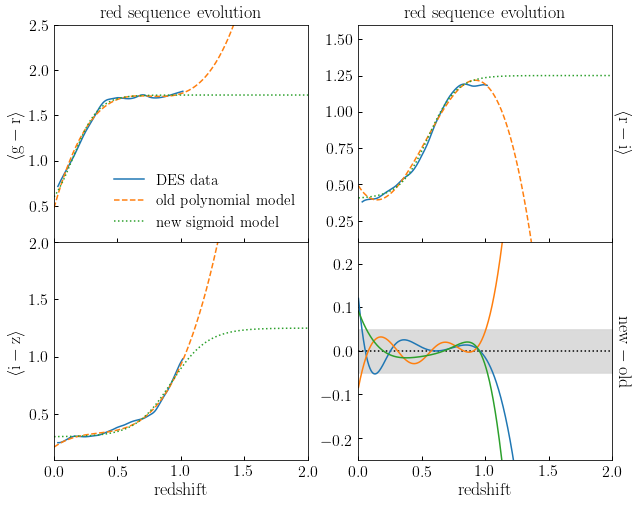

In [54]:
fig, _axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4
fig.subplots_adjust(hspace=0)  #  smash left and right plots

xlim = ax1.set_xlim(0, 2)

__=ax1.plot(ztable, mean_colors['gr'], color=mblue, label=r'${\rm DES\ data}$')
__=ax2.plot(ztable, mean_colors['ri'], color=mblue)
__=ax3.plot(ztable, mean_colors['iz'], color=mblue)

__=ax1.plot(zold, grold, '--', color=morange, label=r'${\rm old\ polynomial\ model}$')
__=ax2.plot(zold, riold, '--', color=morange)
__=ax3.plot(zold, izold, '--', color=morange)

grnew = des.mean_des_red_sequence_gr_color_vs_redshift(zold)
rinew = des.mean_des_red_sequence_ri_color_vs_redshift(zold)
iznew = des.mean_des_red_sequence_iz_color_vs_redshift(zold)
__=ax1.plot(zold, grnew, ':', color=mgreen,
           label=r'${\rm new\ sigmoid\ model}$')
__=ax2.plot(zold, rinew, ':', color=mgreen)
__=ax3.plot(zold, iznew, ':', color=mgreen)

ylim1 = ax1.set_ylim(0.1, 2.5)
ylim2 = ax2.set_ylim(0.1, 1.6)
ylim3 = ax3.set_ylim(0.1, 2.)
ylim4 = ax4.set_ylim(-0.25, 0.25)

leg1 = ax1.legend()
title = ax1.set_title(r'${\rm red\ sequence\ evolution}$')
title = ax2.set_title(r'${\rm red\ sequence\ evolution}$')

__=ax2.yaxis.set_label_position("right")
__=ax4.yaxis.set_label_position("right")
ylabel1 = ax1.set_ylabel(r'${\rm \langle g-r\rangle}$')
ylabel2 = ax2.set_ylabel(r'${\rm \langle r-i\rangle}$', rotation=-90, labelpad=20)
ylabel3 = ax3.set_ylabel(r'${\rm \langle i-z\rangle }$')
ylabel4 = ax4.set_ylabel(r'${\rm new-old}$', rotation=-90, labelpad=20)


dgr = grnew-grold
dri = rinew-riold
diz = iznew-izold
y1 = np.zeros_like(zold) - 0.05
y2 = np.zeros_like(zold) + 0.05
__=ax4.fill_between(zold, y1, y2, color='lightgray', alpha=0.8)
__=ax4.plot(np.linspace(0, 5, 1000), np.zeros(1000), ':', color='k')
__=ax4.plot(zold, dgr)
__=ax4.plot(zold, dri)
__=ax4.plot(zold, diz)

xlabel3 = ax3.set_xlabel(r'${\rm redshift}$')
xlabel4 = ax4.set_xlabel(r'${\rm redshift}$')

figname = 'new_red_sequence_model.png'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel1], bbox_inches='tight')